In [1]:
# using Revise
include("../src/StatReg.jl")
using .StatReg

In [2]:
using Plots
plotly()
gr(size=(500,500), html_output_format=:png)

a = 0
b = 6.

function phi(x::Real)
    mu1 = 2.
    mu2 = 4.
    n1 = 4.
    n2 = 2.
    sig1 = 0.4
    sig2 = 0.5
    norm(n, mu, sig, x) = n / sqrt(2 * pi*sig^2) * exp(-(x - mu)^2 / (2 * sig^2))
    return norm(n1, mu1, sig1, x) + norm(n2, mu2, sig2, x)
end

x = collect(range(a, stop=b, length=300));
plot(x, phi.(x), title="Real phi function", label="Phi(x)")
savefig("real_phi.png")

In [3]:
using QuadGK
kernel_name = "rectangular"
kernel(x::Real, y::Real) = getOpticsKernels(kernel_name)(x, y)

convolution = y -> quadgk(x -> kernel(x,y) * phi(x), a, b, rtol=10^-5, maxevals=10^7)[1]
y = collect(range(a, stop=b, length=30))
ftrue = convolution.(y)

sig = 0.1*ftrue + [0.01 for i = 1:Base.length(ftrue)]

using Compat, Random, Distributions
noise = []
Random.seed!(1234)
for sigma in sig
    n = rand(Normal(0., sigma), 1)[1]
    push!(noise, n)
end

f = ftrue + noise;
plot(y, f, title="$(kernel_name) kernel", label="f(y)", seriestype=:scatter, yerr=sig)
savefig("integrated_$(kernel_name).png")

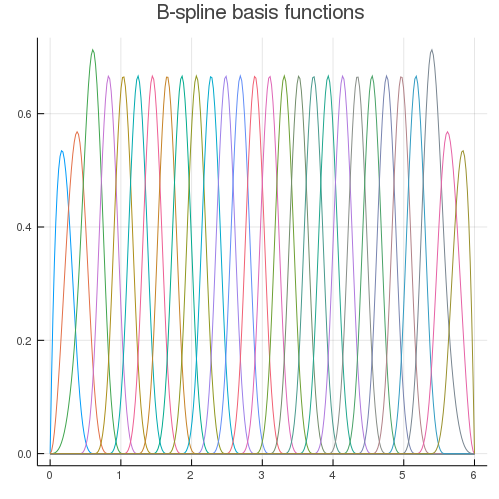

In [7]:
basis = CubicSplineBasis(y, "dirichlet")
p = plot()
for func in basis.basis_functions
    p = plot!(x, func.(x), title="B-spline basis functions", legend=false, show = true)
end
display(p)
savefig("basis.png")

In [8]:
Omega = omega(basis, 2)

result = solve(
    basis,
    f,
    sig,
    kernel,
    y,
    AHMCSampling(),
    ArgmaxOptim(),
    [Omega],
    PhiBounds(),
    );




┌ Info: Calculating omega matrix for Cubis spline basis derivatives of order 2...
└ @ Main.StatReg /Users/ta_nyan/Documents/diploma/StatReg.jl/src/bases/cubic_spline.jl:103
┌ Info: Omega caclulated successfully.
└ @ Main.StatReg /Users/ta_nyan/Documents/diploma/StatReg.jl/src/bases/cubic_spline.jl:117
┌ Info: starting solve
└ @ Main.StatReg /Users/ta_nyan/Documents/diploma/StatReg.jl/src/solvers/solve.jl:12
┌ Info: Starting discretize kernel...
└ @ Main.StatReg /Users/ta_nyan/Documents/diploma/StatReg.jl/src/bases/utils.jl:20
┌ Info: Kernel was discretized successfully.
└ @ Main.StatReg /Users/ta_nyan/Documents/diploma/StatReg.jl/src/bases/utils.jl:32
┌ Info: before alphas
└ @ Main.StatReg /Users/ta_nyan/Documents/diploma/StatReg.jl/src/solvers/solve.jl:18
┌ Info: Starting find_optimal_alpha...
└ @ Main.StatReg /Users/ta_nyan/Documents/diploma/StatReg.jl/src/utils/other_utils.jl:11
┌ Info: Starting optimization...
└ @ Main.StatReg /Users/ta_nyan/Documents/diploma/StatReg.jl/src/utils/o

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  1%|▍                              |  ETA: 0:04:54
  iterations:                    105
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.6858525785769882
  log_density:                   -22.62524793378696
  hamiltonian_energy:            36.607936200058674
  hamiltonian_energy_error:      0.21412959075328786
  max_hamiltonian_energy_error:  0.9201682623747516
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  1%|▍                              |  ETA: 0:04:26
  iterations:                    120
  n_steps:                       15
  is_accept:

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  2%|▊                              |  ETA: 0:02:57
  iterations:                    226
  n_steps:                       23
  is_accept:                     true
  acceptance_rate:               0.695059590245869
  log_density:                   -18.50640868776444
  hamiltonian_energy:            32.682245360103465
  hamiltonian_energy_error:      0.2808983877361868
  max_hamiltonian_energy_error:  0.732969584945458
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  2%|▊                              |  ETA: 0:02:50
  iterations:                    240
  n_steps:                       31
  is_accept:   

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  4%|█▏                             |  ETA: 0:02:12
  iterations:                    375
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.8410071386822903
  log_density:                   -19.488428785771802
  hamiltonian_energy:            33.04576813369438
  hamiltonian_energy_error:      -0.028783828087114216
  max_hamiltonian_energy_error:  0.44477909106682745
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  4%|█▎                             |  ETA: 0:02:09
  iterations:                    390
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  5%|█▋                             |  ETA: 0:01:53
  iterations:                    512
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.799105635164982
  log_density:                   -19.79573317354877
  hamiltonian_energy:            32.778475691907545
  hamiltonian_energy_error:      0.12669387007157695
  max_hamiltonian_energy_error:  0.6200440983664635
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  5%|█▋                             |  ETA: 0:01:51
  iterations:                    528
  n_steps:                       15
  is_accept: 

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  7%|██                             |  ETA: 0:01:42
  iterations:                    659
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.7726512182932798
  log_density:                   -26.514136815634316
  hamiltonian_energy:            37.12010517141316
  hamiltonian_energy_error:      0.3909195513774506
  max_hamiltonian_energy_error:  0.6540533725342215
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  7%|██▏                            |  ETA: 0:01:41
  iterations:                    676
  n_steps:                       15
  is_accept:  

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  8%|██▌                            |  ETA: 0:01:35
  iterations:                    797
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.8757368216285085
  log_density:                   -20.85250900831307
  hamiltonian_energy:            36.43022803148313
  hamiltonian_energy_error:      0.0585081352795882
  max_hamiltonian_energy_error:  0.5453053907573207
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  8%|██▌                            |  ETA: 0:01:34
  iterations:                    814
  n_steps:                       15
  is_accept:  

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  9%|██▉                            |  ETA: 0:01:30
  iterations:                    925
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9181923739175291
  log_density:                   -18.305420991183766
  hamiltonian_energy:            33.28739389280349
  hamiltonian_energy_error:      -0.19355847836857976
  max_hamiltonian_energy_error:  0.3342635505351339
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling  9%|██▉                            |  ETA: 0:01:30
  iterations:                    942
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 11%|███▎                           |  ETA: 0:01:26
  iterations:                    1064
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.9677937989666282
  log_density:                   -19.483144197026576
  hamiltonian_energy:            32.881420959372406
  hamiltonian_energy_error:      -0.20334825434002823
  max_hamiltonian_energy_error:  -0.6551856804550553
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 11%|███▍                           |  ETA: 0:01:25
  iterations:                    1080
  n_steps:                       15
  is_ac

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 12%|███▊                           |  ETA: 0:01:22
  iterations:                    1194
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.8757353261054257
  log_density:                   -17.831865018031266
  hamiltonian_energy:            37.16401937526785
  hamiltonian_energy_error:      -0.16688099775010556
  max_hamiltonian_energy_error:  0.36401547089434416
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 12%|███▊                           |  ETA: 0:01:22
  iterations:                    1209
  n_steps:                       15
  is_acc

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 13%|████▏                          |  ETA: 0:01:19
  iterations:                    1326
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.925043150274856
  log_density:                   -18.700467500389806
  hamiltonian_energy:            30.291723363412764
  hamiltonian_energy_error:      0.05527936316297399
  max_hamiltonian_energy_error:  0.31478016580503265
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 13%|████▏                          |  ETA: 0:01:19
  iterations:                    1341
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 14%|████▌                          |  ETA: 0:01:17
  iterations:                    1450
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9222003697324493
  log_density:                   -18.10326669403612
  hamiltonian_energy:            32.39270981651666
  hamiltonian_energy_error:      -0.0012147548894247961
  max_hamiltonian_energy_error:  0.3314905776920085
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 15%|████▌                          |  ETA: 0:01:17
  iterations:                    1464
  n_steps:                       15
  is_acc

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 16%|████▉                          |  ETA: 0:01:15
  iterations:                    1578
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9906541567946353
  log_density:                   -23.20632668696485
  hamiltonian_energy:            35.72541891318833
  hamiltonian_energy_error:      -0.26745731209542356
  max_hamiltonian_energy_error:  -0.6638365745996495
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 16%|█████                          |  ETA: 0:01:15
  iterations:                    1594
  n_steps:                       31
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 17%|█████▎                         |  ETA: 0:01:13
  iterations:                    1712
  n_steps:                       23
  is_accept:                     true
  acceptance_rate:               0.9257507644320164
  log_density:                   -18.939473620747766
  hamiltonian_energy:            28.08770110373984
  hamiltonian_energy_error:      0.12054173951915459
  max_hamiltonian_energy_error:  0.34151396719438765
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 17%|█████▍                         |  ETA: 0:01:13
  iterations:                    1727
  n_steps:                       31
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 18%|█████▊                         |  ETA: 0:01:11
  iterations:                    1842
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.8227995715443981
  log_density:                   -26.253697306009574
  hamiltonian_energy:            45.605657338916984
  hamiltonian_energy_error:      0.059657518606591964
  max_hamiltonian_energy_error:  0.7372088621832873
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 19%|█████▊                         |  ETA: 0:01:11
  iterations:                    1855
  n_steps:                       23
  is_acc

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 20%|██████▏                        |  ETA: 0:01:10
  iterations:                    1964
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.6511194830179583
  log_density:                   -28.481653558160673
  hamiltonian_energy:            36.16284969084997
  hamiltonian_energy_error:      1.2605104641287426
  max_hamiltonian_energy_error:  1.2617912000379405
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 20%|██████▏                        |  ETA: 0:01:09
  iterations:                    1977
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 21%|██████▌                        |  ETA: 0:01:08
  iterations:                    2111
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9976673754160531
  log_density:                   -24.09516266452861
  hamiltonian_energy:            39.91305007661865
  hamiltonian_energy_error:      -0.25673642656908413
  max_hamiltonian_energy_error:  -0.5625721083840176
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 21%|██████▋                        |  ETA: 0:01:07
  iterations:                    2123
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 22%|███████                        |  ETA: 0:01:06
  iterations:                    2239
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.8133708220294359
  log_density:                   -15.992666752864267
  hamiltonian_energy:            31.094776595085342
  hamiltonian_energy_error:      -0.34789489292364095
  max_hamiltonian_energy_error:  0.5763015748042477
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 23%|███████                        |  ETA: 0:01:06
  iterations:                    2253
  n_steps:                       7
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 24%|███████▍                       |  ETA: 0:01:04
  iterations:                    2370
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.7877996971716578
  log_density:                   -26.8584562568071
  hamiltonian_energy:            40.10649626676009
  hamiltonian_energy_error:      0.4910710898414621
  max_hamiltonian_energy_error:  0.5406621207456652
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 24%|███████▍                       |  ETA: 0:01:04
  iterations:                    2387
  n_steps:                       23
  is_accept: 

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 25%|███████▊                       |  ETA: 0:01:03
  iterations:                    2507
  n_steps:                       23
  is_accept:                     true
  acceptance_rate:               0.9629195811049438
  log_density:                   -18.147581711169718
  hamiltonian_energy:            30.678449111406472
  hamiltonian_energy_error:      -0.37619027738747945
  max_hamiltonian_energy_error:  -0.5147319571285855
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 25%|███████▊                       |  ETA: 0:01:03
  iterations:                    2520
  n_steps:                       15
  is_ac

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 26%|████████▏                      |  ETA: 0:01:01
  iterations:                    2632
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.9465084834281438
  log_density:                   -29.177426504923016
  hamiltonian_energy:            39.570291658648024
  hamiltonian_energy_error:      0.2513320942326658
  max_hamiltonian_energy_error:  -0.40499653947760095
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 26%|████████▎                      |  ETA: 0:01:01
  iterations:                    2647
  n_steps:                       7
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 28%|████████▋                      |  ETA: 0:01:00
  iterations:                    2765
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.812667711638625
  log_density:                   -19.950726795903503
  hamiltonian_energy:            34.934686819483446
  hamiltonian_energy_error:      -0.06436989289475292
  max_hamiltonian_energy_error:  0.4687334456024601
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 28%|████████▋                      |  ETA: 0:01:00
  iterations:                    2778
  n_steps:                       15
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 29%|█████████                      |  ETA: 0:00:58
  iterations:                    2899
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9092642128579075
  log_density:                   -26.545170023865793
  hamiltonian_energy:            39.309519590362555
  hamiltonian_energy_error:      0.1588187073711822
  max_hamiltonian_energy_error:  0.4250331979046038
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 29%|█████████                      |  ETA: 0:00:58
  iterations:                    2914
  n_steps:                       15
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 30%|█████████▍                     |  ETA: 0:00:57
  iterations:                    3031
  n_steps:                       47
  is_accept:                     true
  acceptance_rate:               0.8067736293711207
  log_density:                   -19.84746238678041
  hamiltonian_energy:            31.25838903809933
  hamiltonian_energy_error:      0.11623478609868698
  max_hamiltonian_energy_error:  0.5583083099883055
  tree_depth:                    5
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 30%|█████████▍                     |  ETA: 0:00:57
  iterations:                    3044
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 32%|█████████▊                     |  ETA: 0:00:56
  iterations:                    3159
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.9248588378709157
  log_density:                   -22.344193018687363
  hamiltonian_energy:            31.339561803528767
  hamiltonian_energy_error:      0.25075781894081217
  max_hamiltonian_energy_error:  -0.5349672603597391
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 32%|█████████▉                     |  ETA: 0:00:56
  iterations:                    3175
  n_steps:                       15
  is_acc

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 33%|██████████▎                    |  ETA: 0:00:54
  iterations:                    3295
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.7082344185294751
  log_density:                   -23.96882908390355
  hamiltonian_energy:            39.200541118398036
  hamiltonian_energy_error:      0.6459827757681609
  max_hamiltonian_energy_error:  0.9580700587689464
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 33%|██████████▎                    |  ETA: 0:00:54
  iterations:                    3310
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 34%|██████████▋                    |  ETA: 0:00:53
  iterations:                    3433
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.708266791271336
  log_density:                   -24.79704693539437
  hamiltonian_energy:            35.44880613692695
  hamiltonian_energy_error:      0.17214359039723348
  max_hamiltonian_energy_error:  0.7262103140369902
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 34%|██████████▋                    |  ETA: 0:00:53
  iterations:                    3444
  n_steps:                       31
  is_accept:

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 36%|███████████                    |  ETA: 0:00:52
  iterations:                    3567
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.8829849243092537
  log_density:                   -21.9221144848105
  hamiltonian_energy:            35.972154697632334
  hamiltonian_energy_error:      0.19002454881163544
  max_hamiltonian_energy_error:  0.3726804284216527
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 36%|███████████▏                   |  ETA: 0:00:52
  iterations:                    3582
  n_steps:                       31
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 37%|███████████▌                   |  ETA: 0:00:51
  iterations:                    3699
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9907086638885131
  log_density:                   -22.37635563072597
  hamiltonian_energy:            36.988806283057315
  hamiltonian_energy_error:      -0.5138867827289815
  max_hamiltonian_energy_error:  -1.0420302816758067
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 37%|███████████▌                   |  ETA: 0:00:51
  iterations:                    3709
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 38%|███████████▉                   |  ETA: 0:00:49
  iterations:                    3832
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9031034214622934
  log_density:                   -17.360446490796473
  hamiltonian_energy:            31.44037270775643
  hamiltonian_energy_error:      -0.27811606389893484
  max_hamiltonian_energy_error:  0.38001163092619805
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 38%|███████████▉                   |  ETA: 0:00:49
  iterations:                    3844
  n_steps:                       23
  is_acc

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 40%|████████████▎                  |  ETA: 0:00:48
  iterations:                    3963
  n_steps:                       23
  is_accept:                     true
  acceptance_rate:               0.6504378431949046
  log_density:                   -16.510521295114312
  hamiltonian_energy:            24.520020597922997
  hamiltonian_energy_error:      0.3188312504980466
  max_hamiltonian_energy_error:  0.8091579386930263
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 40%|████████████▍                  |  ETA: 0:00:48
  iterations:                    3980
  n_steps:                       23
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 41%|████████████▊                  |  ETA: 0:00:47
  iterations:                    4098
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.7165352830294748
  log_density:                   -25.36639429907892
  hamiltonian_energy:            39.76919316708157
  hamiltonian_energy_error:      0.5936114174349001
  max_hamiltonian_energy_error:  0.8396254063632114
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 41%|████████████▊                  |  ETA: 0:00:47
  iterations:                    4114
  n_steps:                       15
  is_accept:

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 42%|█████████████▏                 |  ETA: 0:00:46
  iterations:                    4237
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.740195623749576
  log_density:                   -18.660806067088977
  hamiltonian_energy:            33.14980277541521
  hamiltonian_energy_error:      0.1345637476404491
  max_hamiltonian_energy_error:  0.6686473703419296
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 43%|█████████████▏                 |  ETA: 0:00:45
  iterations:                    4254
  n_steps:                       15
  is_accept:

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 44%|█████████████▋                 |  ETA: 0:00:44
  iterations:                    4377
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9486902893146653
  log_density:                   -27.53659926444028
  hamiltonian_energy:            40.92488250068055
  hamiltonian_energy_error:      0.17220289354609264
  max_hamiltonian_energy_error:  -0.6099238673152669
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 44%|█████████████▋                 |  ETA: 0:00:44
  iterations:                    4394
  n_steps:                       15
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 45%|██████████████                 |  ETA: 0:00:43
  iterations:                    4510
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9792984474626484
  log_density:                   -17.71344812830778
  hamiltonian_energy:            30.967444189115067
  hamiltonian_energy_error:      -0.06368467905014441
  max_hamiltonian_energy_error:  -0.23101518523718312
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 45%|██████████████                 |  ETA: 0:00:43
  iterations:                    4524
  n_steps:                       15
  is_ac

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 46%|██████████████▍                |  ETA: 0:00:42
  iterations:                    4638
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9986203434061213
  log_density:                   -23.79134253180561
  hamiltonian_energy:            33.40765222874917
  hamiltonian_energy_error:      -0.07596396457840626
  max_hamiltonian_energy_error:  -0.47342645953443707
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 47%|██████████████▍                |  ETA: 0:00:42
  iterations:                    4653
  n_steps:                       15
  is_acc

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 48%|██████████████▊                |  ETA: 0:00:41
  iterations:                    4766
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.5458306447747499
  log_density:                   -21.273714353176956
  hamiltonian_energy:            36.33744570277649
  hamiltonian_energy_error:      0.1215349971790971
  max_hamiltonian_energy_error:  1.1426717926241636
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 48%|██████████████▉                |  ETA: 0:00:41
  iterations:                    4780
  n_steps:                       15
  is_accept:

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 49%|███████████████▏               |  ETA: 0:00:40
  iterations:                    4897
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9015664982300733
  log_density:                   -21.102066199542683
  hamiltonian_energy:            38.82911682753482
  hamiltonian_energy_error:      -0.2003233892985108
  max_hamiltonian_energy_error:  0.32198691195682017
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 49%|███████████████▎               |  ETA: 0:00:40
  iterations:                    4912
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 50%|███████████████▋               |  ETA: 0:00:39
  iterations:                    5027
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.6070572910433035
  log_density:                   -24.32257335077216
  hamiltonian_energy:            38.906213667871604
  hamiltonian_energy_error:      0.6341531392896655
  max_hamiltonian_energy_error:  1.0222941519054132
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 50%|███████████████▋               |  ETA: 0:00:39
  iterations:                    5042
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 52%|████████████████               |  ETA: 0:00:38
  iterations:                    5150
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               1.0
  log_density:                   -21.886140325995264
  hamiltonian_energy:            32.94669840511158
  hamiltonian_energy_error:      -0.28291522429699967
  max_hamiltonian_energy_error:  -0.6321369742372411
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 52%|████████████████               |  ETA: 0:00:38
  iterations:                    5165
  n_steps:                       15
  is_accept:           

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 53%|████████████████▍              |  ETA: 0:00:37
  iterations:                    5287
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.8831527574686314
  log_density:                   -25.166284354200695
  hamiltonian_energy:            37.1441621984013
  hamiltonian_energy_error:      0.08683598822661764
  max_hamiltonian_energy_error:  0.3327908980854204
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 53%|████████████████▌              |  ETA: 0:00:37
  iterations:                    5304
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 54%|████████████████▊              |  ETA: 0:00:36
  iterations:                    5421
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.6611201069824444
  log_density:                   -21.807003000468626
  hamiltonian_energy:            34.40500763676525
  hamiltonian_energy_error:      0.25408635166763105
  max_hamiltonian_energy_error:  0.7624566824616252
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 54%|████████████████▉              |  ETA: 0:00:36
  iterations:                    5434
  n_steps:                       15
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 56%|█████████████████▎             |  ETA: 0:00:35
  iterations:                    5551
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.9851747985663056
  log_density:                   -17.19252371182217
  hamiltonian_energy:            24.306427549413034
  hamiltonian_energy_error:      0.017103834334424306
  max_hamiltonian_energy_error:  -0.13888036389311154
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 56%|█████████████████▎             |  ETA: 0:00:35
  iterations:                    5564
  n_steps:                       15
  is_ac

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 57%|█████████████████▋             |  ETA: 0:00:34
  iterations:                    5670
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.9641703407062787
  log_density:                   -22.44142556605435
  hamiltonian_energy:            35.44817212281946
  hamiltonian_energy_error:      -0.3675463085341022
  max_hamiltonian_energy_error:  -0.3675463085341022
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 57%|█████████████████▋             |  ETA: 0:00:34
  iterations:                    5685
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 58%|██████████████████             |  ETA: 0:00:33
  iterations:                    5800
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.7053576824370832
  log_density:                   -18.953922731401807
  hamiltonian_energy:            32.33415482026593
  hamiltonian_energy_error:      0.1967916124845388
  max_hamiltonian_energy_error:  0.7392666255435074
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 58%|██████████████████             |  ETA: 0:00:33
  iterations:                    5813
  n_steps:                       31
  is_accept:

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 59%|██████████████████▍            |  ETA: 0:00:32
  iterations:                    5926
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9922344115199998
  log_density:                   -22.03483516809569
  hamiltonian_energy:            32.0237706985054
  hamiltonian_energy_error:      0.03288814513107141
  max_hamiltonian_energy_error:  -0.6684136447536453
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 59%|██████████████████▍            |  ETA: 0:00:32
  iterations:                    5940
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 61%|██████████████████▊            |  ETA: 0:00:31
  iterations:                    6056
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.7456986368089368
  log_density:                   -19.654050724192484
  hamiltonian_energy:            40.280870560075996
  hamiltonian_energy_error:      -0.033258296766796036
  max_hamiltonian_energy_error:  0.5856296125035101
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 61%|██████████████████▉            |  ETA: 0:00:31
  iterations:                    6073
  n_steps:                       15
  is_ac

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 62%|███████████████████▏           |  ETA: 0:00:30
  iterations:                    6188
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.6958041292353393
  log_density:                   -21.605004039284196
  hamiltonian_energy:            45.46548869950794
  hamiltonian_energy_error:      0.009402312509045885
  max_hamiltonian_energy_error:  0.7454606166656035
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 62%|███████████████████▎           |  ETA: 0:00:30
  iterations:                    6202
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 63%|███████████████████▋           |  ETA: 0:00:29
  iterations:                    6311
  n_steps:                       23
  is_accept:                     true
  acceptance_rate:               0.8845293737785461
  log_density:                   -23.621540142223054
  hamiltonian_energy:            37.21564161040287
  hamiltonian_energy_error:      0.14418702722513643
  max_hamiltonian_energy_error:  0.6345676932716202
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 63%|███████████████████▋           |  ETA: 0:00:29
  iterations:                    6324
  n_steps:                       15
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 64%|████████████████████           |  ETA: 0:00:28
  iterations:                    6443
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.729462905644612
  log_density:                   -20.977022303435287
  hamiltonian_energy:            42.02058904376585
  hamiltonian_energy_error:      -0.08505068090187251
  max_hamiltonian_energy_error:  0.7028840432417027
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 65%|████████████████████           |  ETA: 0:00:27
  iterations:                    6461
  n_steps:                       23
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 66%|████████████████████▍          |  ETA: 0:00:27
  iterations:                    6566
  n_steps:                       23
  is_accept:                     true
  acceptance_rate:               0.8072503013298745
  log_density:                   -21.826007832387333
  hamiltonian_energy:            34.389473748314096
  hamiltonian_energy_error:      0.3226733000829398
  max_hamiltonian_energy_error:  0.6460448644149537
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 66%|████████████████████▍          |  ETA: 0:00:27
  iterations:                    6581
  n_steps:                       15
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 67%|████████████████████▊          |  ETA: 0:00:26
  iterations:                    6694
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.9635371442424486
  log_density:                   -22.067672423154676
  hamiltonian_energy:            37.488565127387815
  hamiltonian_energy_error:      -0.32622607366155165
  max_hamiltonian_energy_error:  -0.7181128929664524
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 67%|████████████████████▊          |  ETA: 0:00:26
  iterations:                    6709
  n_steps:                       7
  is_acc

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 68%|█████████████████████▏         |  ETA: 0:00:25
  iterations:                    6833
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.7354136064838699
  log_density:                   -17.953397150115826
  hamiltonian_energy:            35.88249921042396
  hamiltonian_energy_error:      -0.24685946926918945
  max_hamiltonian_energy_error:  0.7214784497230724
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 68%|█████████████████████▎         |  ETA: 0:00:24
  iterations:                    6850
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 70%|█████████████████████▋         |  ETA: 0:00:23
  iterations:                    6970
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.5936180019881453
  log_density:                   -16.47710212568858
  hamiltonian_energy:            38.121897825762446
  hamiltonian_energy_error:      -0.11253828738647087
  max_hamiltonian_energy_error:  1.2046851209470546
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 70%|█████████████████████▋         |  ETA: 0:00:23
  iterations:                    6982
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 71%|██████████████████████         |  ETA: 0:00:23
  iterations:                    7092
  n_steps:                       23
  is_accept:                     true
  acceptance_rate:               0.7836401505821853
  log_density:                   -21.35363692641836
  hamiltonian_energy:            37.95947842683523
  hamiltonian_energy_error:      -0.16887607182465558
  max_hamiltonian_energy_error:  0.6536951513063443
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 71%|██████████████████████         |  ETA: 0:00:22
  iterations:                    7103
  n_steps:                       7
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 72%|██████████████████████▍        |  ETA: 0:00:21
  iterations:                    7224
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9047920027424062
  log_density:                   -21.796744303173156
  hamiltonian_energy:            33.56458949402044
  hamiltonian_energy_error:      0.06691760996594098
  max_hamiltonian_energy_error:  -0.5917702282117574
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 72%|██████████████████████▍        |  ETA: 0:00:21
  iterations:                    7237
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 74%|██████████████████████▊        |  ETA: 0:00:20
  iterations:                    7354
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.7033767297511757
  log_density:                   -20.704635142214876
  hamiltonian_energy:            33.704598090268235
  hamiltonian_energy_error:      0.3869915415720868
  max_hamiltonian_energy_error:  0.9644350726380537
  tree_depth:                    5
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 74%|██████████████████████▉        |  ETA: 0:00:20
  iterations:                    7368
  n_steps:                       15
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 75%|███████████████████████▎       |  ETA: 0:00:19
  iterations:                    7486
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               0.7593470282748344
  log_density:                   -19.96750023705437
  hamiltonian_energy:            35.21409831370357
  hamiltonian_energy_error:      -0.14919720941578873
  max_hamiltonian_energy_error:  0.5952640297997931
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 75%|███████████████████████▎       |  ETA: 0:00:19
  iterations:                    7502
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 76%|███████████████████████▋       |  ETA: 0:00:18
  iterations:                    7624
  n_steps:                       7
  is_accept:                     true
  acceptance_rate:               1.0
  log_density:                   -17.375521831229456
  hamiltonian_energy:            29.52415656158933
  hamiltonian_energy_error:      -0.742439214402566
  max_hamiltonian_energy_error:  -0.8965420044390839
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 76%|███████████████████████▋       |  ETA: 0:00:18
  iterations:                    7639
  n_steps:                       7
  is_accept:               

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 78%|████████████████████████       |  ETA: 0:00:17
  iterations:                    7755
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.7602145289008884
  log_density:                   -23.34184253678463
  hamiltonian_energy:            37.76258373163549
  hamiltonian_energy_error:      0.27285688910258443
  max_hamiltonian_energy_error:  0.6729493939857107
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 78%|████████████████████████▏      |  ETA: 0:00:17
  iterations:                    7770
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 79%|████████████████████████▌      |  ETA: 0:00:16
  iterations:                    7885
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.8905833826918083
  log_density:                   -24.1205273217074
  hamiltonian_energy:            38.699461889244695
  hamiltonian_energy_error:      0.1626861428386448
  max_hamiltonian_energy_error:  0.4071768262473654
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 79%|████████████████████████▌      |  ETA: 0:00:16
  iterations:                    7898
  n_steps:                       23
  is_accept:

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 80%|████████████████████████▉      |  ETA: 0:00:15
  iterations:                    8025
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.8827876130805684
  log_density:                   -20.806416069864067
  hamiltonian_energy:            32.333912613007186
  hamiltonian_energy_error:      0.3154818887351709
  max_hamiltonian_energy_error:  0.320754488188399
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 80%|████████████████████████▉      |  ETA: 0:00:15
  iterations:                    8041
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 82%|█████████████████████████▎     |  ETA: 0:00:14
  iterations:                    8157
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9953424157740447
  log_density:                   -16.612265611776543
  hamiltonian_energy:            27.931220077644817
  hamiltonian_energy_error:      -0.17771107616137272
  max_hamiltonian_energy_error:  -0.17771107616137272
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 82%|█████████████████████████▍     |  ETA: 0:00:14
  iterations:                    8171
  n_steps:                       15
  is_a

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 83%|█████████████████████████▊     |  ETA: 0:00:13
  iterations:                    8291
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9864788413032678
  log_density:                   -23.633796132761482
  hamiltonian_energy:            36.528738850193506
  hamiltonian_energy_error:      -0.06762439159390965
  max_hamiltonian_energy_error:  -0.42970756861451775
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 83%|█████████████████████████▊     |  ETA: 0:00:13
  iterations:                    8304
  n_steps:                       15
  is_a

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 84%|██████████████████████████▏    |  ETA: 0:00:12
  iterations:                    8421
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.7704718232473156
  log_density:                   -28.769650127266562
  hamiltonian_energy:            43.72844331739124
  hamiltonian_energy_error:      0.4355917538745686
  max_hamiltonian_energy_error:  0.6698712451952744
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 84%|██████████████████████████▏    |  ETA: 0:00:12
  iterations:                    8433
  n_steps:                       23
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 86%|██████████████████████████▌    |  ETA: 0:00:11
  iterations:                    8557
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.6789194267606481
  log_density:                   -22.05855498973206
  hamiltonian_energy:            40.62741677165267
  hamiltonian_energy_error:      0.015011044472693413
  max_hamiltonian_energy_error:  0.8355180212647468
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 86%|██████████████████████████▋    |  ETA: 0:00:11
  iterations:                    8571
  n_steps:                       15
  is_accep

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 87%|██████████████████████████▉    |  ETA: 0:00:10
  iterations:                    8687
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.8732243471076856
  log_density:                   -26.076693895380355
  hamiltonian_energy:            42.09440547095005
  hamiltonian_energy_error:      0.24512329088648954
  max_hamiltonian_energy_error:  -0.7615014268722788
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 87%|███████████████████████████    |  ETA: 0:00:10
  iterations:                    8701
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 88%|███████████████████████████▍   |  ETA: 0:00:09
  iterations:                    8818
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.7813893353160013
  log_density:                   -24.153030127948824
  hamiltonian_energy:            40.87778113521409
  hamiltonian_energy_error:      0.07955019576876765
  max_hamiltonian_energy_error:  0.638610109972241
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 88%|███████████████████████████▍   |  ETA: 0:00:09
  iterations:                    8832
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 89%|███████████████████████████▊   |  ETA: 0:00:08
  iterations:                    8949
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9821063590452964
  log_density:                   -22.75814763982255
  hamiltonian_energy:            42.17454712969186
  hamiltonian_energy_error:      -0.17558524694041466
  max_hamiltonian_energy_error:  -0.3587298965015009
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 90%|███████████████████████████▊   |  ETA: 0:00:08
  iterations:                    8964
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 91%|████████████████████████████▏  |  ETA: 0:00:07
  iterations:                    9075
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.7970476116296363
  log_density:                   -32.29846655926227
  hamiltonian_energy:            51.19788431212956
  hamiltonian_energy_error:      -0.04407971686576673
  max_hamiltonian_energy_error:  0.69728674358565
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 91%|████████████████████████████▏  |  ETA: 0:00:07
  iterations:                    9092
  n_steps:                       7
  is_accept: 

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 92%|████████████████████████████▌  |  ETA: 0:00:06
  iterations:                    9203
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.757470217765719
  log_density:                   -21.196744670083092
  hamiltonian_energy:            33.45310737973843
  hamiltonian_energy_error:      0.03411036840586945
  max_hamiltonian_energy_error:  0.6515808163987984
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 92%|████████████████████████████▋  |  ETA: 0:00:06
  iterations:                    9216
  n_steps:                       15
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 93%|████████████████████████████▉  |  ETA: 0:00:05
  iterations:                    9332
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.991493370935216
  log_density:                   -24.18975010835542
  hamiltonian_energy:            38.99849569877833
  hamiltonian_energy_error:      -0.11491471408437093
  max_hamiltonian_energy_error:  -0.6421617492335727
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 93%|█████████████████████████████  |  ETA: 0:00:05
  iterations:                    9349
  n_steps:                       7
  is_accept

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 95%|█████████████████████████████▍ |  ETA: 0:00:04
  iterations:                    9464
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9548023329857187
  log_density:                   -25.624515562838322
  hamiltonian_energy:            42.6711953091239
  hamiltonian_energy_error:      0.014504356989846201
  max_hamiltonian_energy_error:  0.18439516371931575
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 95%|█████████████████████████████▍ |  ETA: 0:00:04
  iterations:                    9479
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 96%|█████████████████████████████▊ |  ETA: 0:00:03
  iterations:                    9598
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.8280062572862363
  log_density:                   -21.656441606132823
  hamiltonian_energy:            39.62660221487853
  hamiltonian_energy_error:      -0.05251007455318302
  max_hamiltonian_energy_error:  0.48770711455443916
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 96%|█████████████████████████████▊ |  ETA: 0:00:03
  iterations:                    9610
  n_steps:                       7
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 97%|██████████████████████████████▏|  ETA: 0:00:02
  iterations:                    9720
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.9976498067864303
  log_density:                   -26.754642562588813
  hamiltonian_energy:            42.15848206058855
  hamiltonian_energy_error:      -0.1681311331314319
  max_hamiltonian_energy_error:  -0.3807308164885086
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 97%|██████████████████████████████▏|  ETA: 0:00:02
  iterations:                    9736
  n_steps:                       15
  is_acce

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 98%|██████████████████████████████▌|  ETA: 0:00:01
  iterations:                    9849
  n_steps:                       15
  is_accept:                     true
  acceptance_rate:               0.771493757828134
  log_density:                   -19.47544291588174
  hamiltonian_energy:            31.59461381423553
  hamiltonian_energy_error:      0.14285479840287252
  max_hamiltonian_energy_error:  0.6165161886655426
  tree_depth:                    3
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling 99%|██████████████████████████████▋|  ETA: 0:00:01
  iterations:                    9865
  n_steps:                       7
  is_accept: 

4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling100%|██████████████████████████████▉|  ETA: 0:00:00
  iterations:                    9969
  n_steps:                       31
  is_accept:                     true
  acceptance_rate:               0.978257240752069
  log_density:                   -32.35805966229215
  hamiltonian_energy:            48.75226070506695
  hamiltonian_energy_error:      0.12971133431356208
  max_hamiltonian_energy_error:  -0.8406110511375147
  tree_depth:                    4
  numerical_error:               false
  step_size:                     0.09927119307435697
  nom_step_size:                 0.09927119307435697
  is_adapt:                      false
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...])













Sampling100%|███████████████████████████████|  ETA: 0:00:00
  iterations:                    9985
  n_steps:                       15
  is_accept

In [10]:
phi_reconstructed = result.solution_function.(x)
phi_reconstructed_errors = result.error_function.(x)

plot(x, phi_reconstructed, ribbon=phi_reconstructed_errors, fillalpha=0.3, label="Reconstructed function with errors")
plot!(x, phi.(x), label="Real function")
savefig("reconstructed.png")